#### Question 1. Think about what could be going wrong with our calculation. 
##### Answer: The outliers in the data are affecting the result. Some of the order amounts are way too higher than the majority of the order amounts. User with user_id 607 has placed all orders with 2000 items each amounting all of its total order amounts greater than 700000, while 98.5% of the order amounts are less than 1000.
#### Question 2. Think about a better way to evaluate this data.
##### Answer: Detect the outliers and remove them from the dataset before calculating the average order value.
#### 3. What metric would you report for this dataset? What is its value?
##### Answer: I would see the average basket size over the month; The value is 2 (1.985).

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/Mansi/Documents/dataset.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


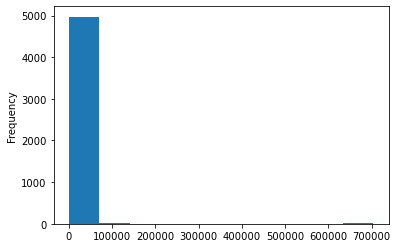

In [5]:
df['order_amount'].plot.hist(by='order_amount') #plotting histogram of order amounts

#### Using IQR rule to detect outliers

In [8]:
q75, q25 = np.percentile(df.order_amount, [75,25])
iqr = q75 - q25
# calculate the cutoff for extreme outliers
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
print("q25:", q25 ,"\nq75:",q75,"\nIQR:",iqr, "\nLower Cut Off:",lower, "\nUpper Cut Off:",upper )

q25: 163.0 
q75: 390.0 
IQR: 227.0 
Lower Cut Off: -518.0 
Upper Cut Off: 1071.0


In [51]:
print("Number of records above outlier threshold:", len(df[df['order_amount'] > 1071]))
print("lowest order amount amongst outliers:",df[df['order_amount'] > 1071]['order_amount'].min())
print("highest order amount amongst outliers:",df[df['order_amount'] > 1071]['order_amount'].max())

Number of records above outlier threshold: 67
lowest order amount amongst outliers: 1086
highest order amount amongst outliers: 704000


#### Calculating revised average order value after removing outliers from dataset

In [11]:
df_outliers_removed = df[df['order_amount'] < 1071]
print("Number of records removed:", len(df) - len(df_outliers_removed['order_amount']))
print("Average order value (AOV):",df_outliers_removed['order_amount'].mean())

Number of records removed: 67
Average order value (AOV): 301.6780863571863


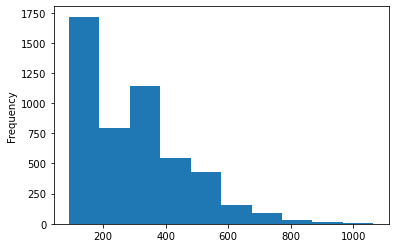

In [23]:
#Plot the the histogram of order_amounts after removing outliers
df_outliers_removed['order_amount'].plot.hist(by='order_amount') #plotting histogram of raw scores

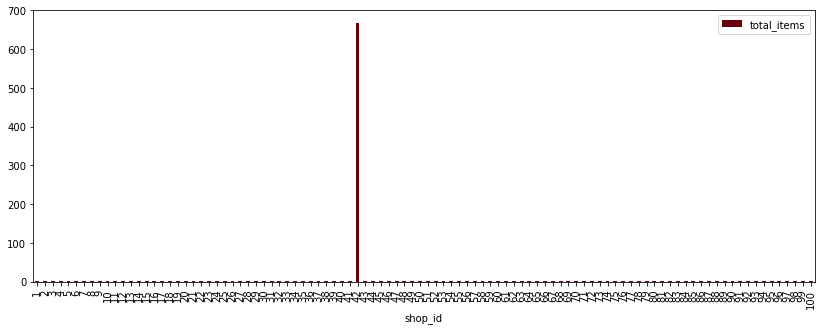

In [32]:
#Plot the the distribution of average basket size(total items per order) for each shop
plt.figure(figsize = (14,5))
df.groupby('shop_id')['total_items'].agg('mean').plot.bar(legend=True, colormap='Reds_r')

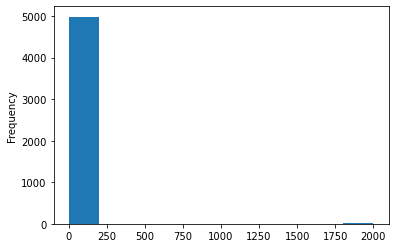

In [46]:
df['total_items'].plot.hist(by='total_items') #plotting histogram of order amounts

In [39]:
df[df['total_items']> 600]['shop_id'].unique()

array([42])

In [45]:
df[(df['shop_id'] == 42) & (df['total_items'] < 600)].count()

order_id          34
shop_id           34
user_id           34
order_amount      34
total_items       34
payment_method    34
created_at        34
dtype: int64

#### Using IQR rule to detect outliers

In [48]:
q75, q25 = np.percentile(df.total_items, [75,25])
iqr = q75 - q25
# calculate the cutoff for outliers
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("q25:", q25 ,"\nq75:",q75,"\nIQR:",iqr, "\nLower Cut Off:",lower, "\nUpper Cut Off:",upper )

q25: 1.0 
q75: 3.0 
IQR: 2.0 
Lower Cut Off: -2.0 
Upper Cut Off: 6.0


In [55]:
print("Number of records above outlier threshold:", len(df[df['total_items'] > 6]))
print("lowest order amount amongst outliers:",df[df['total_items'] > 6]['total_items'].min())
print("highest order amount amongst outliers:",df[df['total_items'] > 6]['total_items'].max())

Number of records above outlier threshold: 18
lowest order amount amongst outliers: 8
highest order amount amongst outliers: 2000


Average basket size (total items per order) is: 1.9855218178162075


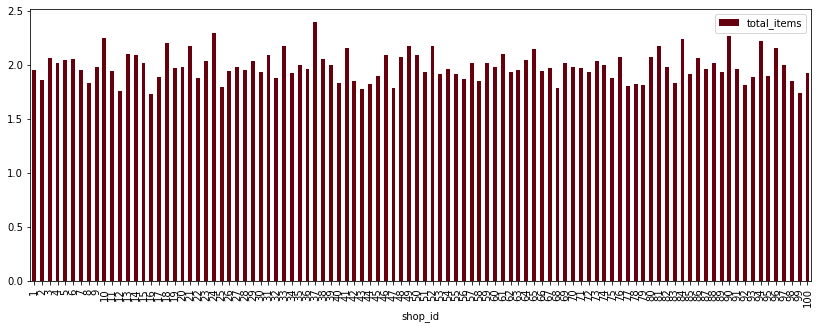

In [56]:
#removing outliers from the dataset and storing the remaining data in a new dataframe
df1 = df[df['total_items'] < 6]
print("Average basket size (total items per order) is:",df1['total_items'].mean())

#Plot the the distribution of average basket size(total items per order) for each shop after removing outlier
plt.figure(figsize = (14,5))
df1.groupby('shop_id')['total_items'].agg('mean').plot.bar(legend=True, colormap='Reds_r')
